## Introduction

in this Hackathon, we'll be examining membership data. There are four different data files. This notebook will provide an initial starting framework to help you get started with the exercise but use it mainly as a starter than as a specific guided approach. The dataset is subsetted from https://www.kaggle.com/c/kkbox-churn-prediction-challenge/data. It has been trimmed down to make the dataset easier to analyze and process.

Participants are encouraged to both read the description from the original source regarding the schema labels as well as examine external reading material for understanding customer churn.

In [119]:
#loading the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
#loading the requisite files

churn_df = pd.read_csv('trunc_churn.csv')
members_df = pd.read_csv('trunc_members.csv')
transact_df = pd.read_csv('trunc_transaction.csv')
users_df = pd.read_csv('trunc_users.csv')

First let's have a look at the various datasets supplied

In [3]:
churn_df.sample(10)

,msno,is_churn
2915,zCMfvUFyFP9Ool2PUEpIfl750SrFfyeqCEbJcJP/K+o=,0
12385,AxYjwfl4jE07SJfXffpUUOOuCBMccc5n/1Q/ZcsfeEE=,0
5324,s79a2/WvHYWIRzJ8E6g3QLbK17KccNq4hejtHmJ4Bf8=,0
12446,md3SkIUbxFDvPM5Z6+Wa25D1YcV+m+LKLZtytz+X29U=,0
6327,RJ2ljp2GQnwgmyJSQClBkXtZdzK+1zaEq4ejVJM0N80=,0
17213,y6Ti/DmoJtDwjBShl4HRAyFKQyNX7IyYGAjOnYElkF8=,0
8646,uv1VaxaFjDEmnkR3pv6kNkrHn1/qZankbG1Vvo1SmQk=,0
12394,MFnr8QAzO52dGuXbmME35xIizSPFB36nmzy/eSWJUNU=,0
16867,+vRWboNZ3fYg1nYvdnnwhdAP6rwHTDlxY02bYD6JuPg=,0
10333,9B6SPMUUfEHuiSc5GzBBxk1ZhMxvyucwCJu2p4dYg9E=,1


In [4]:
churn_df.shape

(20000, 2)

In [5]:
members_df.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time
9287,k/80zad+fmiRNPmaqirx0UDXbggCQpCr1LmuhTP19vE=,10,27,male,9,20120804
15373,p5lBq8QHC6byoukKpJsurXqpZc7WoMzm1seBk4pH8sw=,1,0,NaN,7,20151220
8250,OTerlsnzHJIOelIWojkygP/SNOaNyiuAjbmYj6qr8SM=,22,42,NaN,7,20151223
15778,dwXnIKhatgsLaOBibKzsDC+2chhHRwc5PNyEOWwN0Q8=,13,45,male,9,20140116
13231,1xmbkEkGQq7N1nDrSom/9wUJBS4skQYSkNbqobBCkaM=,1,0,NaN,7,20130609
14129,AAgLZbjF99zk1Fyq+mvLbFmG7Dm7ZypM6dwLa4Slp20=,1,0,NaN,7,20150925
11790,sRVAdw8zNvdFRkUL2m0blD22gvZ40pw/3I203eBYccM=,13,29,male,9,20080531
13165,Q7w85cEPFwjDJJYqbFgRCqbijqsPvwDjsWtgmXtWRzo=,1,0,NaN,7,20150304
13470,qRfm3+3A+i0NlUIUXNOZTpt6ZniqyUcQq9yB3GYpJlM=,5,22,male,3,20130321
5031,hsPTjk3YjGsi3fRU5flVBuJ+yuPqDcC5QeRDEPyZGXI=,1,0,NaN,7,20151220


In [6]:
members_df.shape

(17660, 6)

In [7]:
transact_df.sample(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
19318,fPx91xiTgbkpuDECR885L5VJqCFWez+RnV0Q4D8PEJk=,41,30,99,99,1,20170310,20170410,0
4149,qnxfUtJ00Xt2ndTU7H72A6zXcw/wrj0MLMnNUxTA8sY=,41,30,99,99,1,20170304,20170404,0
2271,jITnWt4ifMF7lI0O8ij2aYkgKrV8JHVulOycI9JQxZs=,41,30,149,149,1,20170302,20170401,0
17065,TMv5DadBx9rMNsEmHacqZBA3aUGC77gMo7tVz17z4mg=,39,30,149,149,1,20170228,20170422,0
10872,8+sIdDZNMogCdrvpD9luWURNVrp+TllkzED+CIfN/UQ=,41,30,99,99,1,20170326,20170426,0
9873,nZylFdb1GV4yZg0hbEl3htyY+s+eG714eKEEktpJAKg=,39,30,149,149,1,20170331,20170515,0
11967,X6riT/eqtp1zaMu/XHzV/6PtFVolEbM/7oBrK9WSoCo=,36,30,180,180,1,20170320,20170419,0
71,iNaUywgsd+rYGNdKQNFa+3lfm3md/vLCacMdiosfcsw=,29,30,180,180,1,20170308,20170408,0
9589,YstbwsibuNithHDcRnuaJdZnRLbLWYEalD7IcDjOcNE=,41,30,99,99,1,20170331,20170430,0
15835,XexaAkNWGi20YFsDYPxs4O8Pd86fY1cK4dNLPNVDr30=,34,30,149,149,1,20170331,20170430,0


In [8]:
transact_df.shape

(23588, 9)

In [9]:
users_df.sample(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
20371,I0PYddmA4S8k0rch8PbH/LAoZU/gGuTbxeBesnBHuAk=,20170301,1,0,0,0,17,15,4185.805
187430,7uOQM1kitfJ+UQ7S0Oij3VPeKwD3MRwJk8zJFiTEKrM=,20170318,0,2,0,0,11,7,2637.770
206817,Y6oMXenZVpVM1aDhZW39aIXxpCTmtc5drSX67/xuCTs=,20170317,20,3,5,2,142,39,36944.021
111387,zWG6ay/bY/wgGLMT80Ac4rW+Xlx+Jb6ZEBL7t8ysoSc=,20170316,0,1,1,1,9,9,2994.785
31777,aqst3qiy+90Erx0oVrBChZrrPDgh71sYUMkBeK8oGlA=,20170310,1,1,0,1,5,5,1683.365
175938,YeIMutFwoVGgY5i8Za+U2bnNSAq5IWCnzNBsk3ZLq9w=,20170315,3,1,1,3,22,28,5708.097
75637,ypIFSe8RYbH+9kGERhkL9LNkAKN9RuNjQOw8+GTKaWY=,20170303,14,0,0,0,12,22,3318.125
195629,q70coof7pvSnEm+P/Mgdk6SGWuxLicAeJiFFoYkkTT8=,20170329,5,2,0,0,2,9,652.982
95261,NIh6Cqc8sqrUEEAQkSBQQZwT0x0iZ3Dv62ki9Bkucz0=,20170324,4,2,1,0,6,8,1999.104
161840,PjCIiGb5/um5sVjZvYnyOLFViZkkPIPp0xHlBP03bOk=,20170312,0,1,0,0,12,9,3103.733


In [10]:
users_df.shape

(277101, 9)

In [11]:
users_df.shape[0] + transact_df.shape[0] + members_df.shape[0] + churn_df.shape[0]

338349

## Data Processessing

We notice that several of the dataframes have a column that is likely to be a timestamp. From the dictionary, we are told  they are supplied in the YYYY/MM/DD format. The following code chunk will convert them into date time stamps.

In [12]:
col_list = [(members_df,'registration_init_time'), (transact_df,'transaction_date'),
            (transact_df,'membership_expire_date'),(users_df,'date')]

for df, col in col_list:
    df[col] = pd.to_datetime(df[col],format='%Y%m%d')

In [13]:
users_df.sample(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
153178,zLgwKe9YAY57ovoUt85h15qNxq0g1r6wQJJZO/XmsyM=,2017-03-20,1,0,1,0,8,10,2158.307
12979,THZ5eVpBdpqiQ9S9C/Fjog/t+ex267alCsjV+GYnwd4=,2017-03-18,4,1,0,0,2,6,688.300
208801,uhVpBWHKRbrWOyJh97u/uWdU208HqNO0CzvIg4PTKws=,2017-03-04,0,0,0,1,4,5,1270.176
252929,7hsIQ0YWbjf2SLMFVlJW2AGB8mEaPRpRK7NcULR1QTI=,2017-03-22,0,0,0,4,27,31,3977.000
258771,iGadYHo4U6XDpNLxoSF3ixAPtdyr608hyjHwyIAlEgQ=,2017-03-16,1,0,1,0,38,39,9359.290
98103,+FJkK77ZWv9FHNGkSREYyPFotnp7WMbPKIeOmE/LCnQ=,2017-03-11,13,3,2,1,10,19,3132.687
133681,4hPsrEJNstcK86HwZbRhYRDvKkOqRaGRQ9jYdDJwWSU=,2017-03-22,1,0,0,2,38,38,9121.435
209139,4TRvsRKTgeVxzDsPFSIJqKL7MmgAs9pqRJeA8lKuRRU=,2017-03-27,1,0,0,0,11,12,2452.298
260682,qjX9HLkrzVoxNXvBZyAiayPgHB8wA4vTJftql8aB2TM=,2017-03-18,0,0,0,0,1,1,271.464
35215,q4QFuiQWLhbgBfkx9MxY4Iaos3S6Z8gmqZKeNbzev+U=,2017-03-07,30,2,1,0,9,39,4523.305


In [49]:
df['bd'] = df['bd'].replace(0,np.nan)

## Merge Data

* Merged both members and transact dataframe to yield customers.
* Merged customers dataframe and churn to yield final df. 
* Open to explore users later on, if there's time.

In [14]:
customers = members_df.merge(transact_df, on="msno", how = "outer")

In [15]:
transact_df.shape[0] + members_df.shape[0]

41248

In [16]:
customers.shape

(24334, 14)

In [17]:
customers.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
20675,zECMO1Hg5GYaCTveGxzYnSSH47beeh3hjfRPiE14cYg=,22.0,28.0,female,9.0,2007-08-15,40.0,30.0,149.0,149.0,1.0,2017-03-27,2017-04-26,0.0
17819,4cqNjVns1Mk3zJS64/8JTZwsLD49ao0ZjRYTtT4cI1g=,1.0,0.0,NaN,7.0,2015-08-14,41.0,30.0,99.0,99.0,1.0,2017-03-31,2017-04-30,0.0
19943,dyKQ7hn+1BiRd0GmOE0mgA1ok9gdWo8W327NcmkMLTs=,1.0,0.0,NaN,4.0,2016-01-31,36.0,30.0,180.0,180.0,0.0,2017-03-09,2017-04-08,0.0
24326,NPMKGFMnAwOFnK1JJbFvgaiCcrqBg/nJ0mj3h2VnOhg=,NaN,NaN,NaN,NaN,NaT,41.0,30.0,99.0,99.0,1.0,2017-03-11,2017-04-11,0.0
16963,pKh/4dkTjVX3zPCKsZRNJKq1FzaEark09e+YhnT9mZs=,1.0,0.0,NaN,7.0,2014-03-25,41.0,30.0,149.0,149.0,1.0,2017-03-24,2017-04-24,0.0
7512,Wgr1DmtX6YMz8Ggsv2KKV0ukCN6LylsijEVarZqJgRU=,3.0,19.0,male,4.0,2016-06-29,38.0,30.0,100.0,100.0,0.0,2017-03-20,2017-04-19,0.0
14181,eTA1Uw/uReRRB5vRr4CmNrEQM91yqO57pRWiS6+yKD0=,1.0,0.0,NaN,7.0,2015-12-06,41.0,30.0,99.0,99.0,1.0,2017-03-08,2017-04-08,0.0
16741,f5qDQL5S1lQ0hiEpzWcaaHsQqnqcllQT2FLTx1s7iH4=,22.0,37.0,male,9.0,2007-04-14,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-04-29,0.0
19931,FTlKGh+6uaWpRbqrIxXDT+QTNGUyJUE5W5cel9BPcX8=,6.0,21.0,male,3.0,2017-02-10,38.0,30.0,149.0,149.0,0.0,2017-03-25,2017-04-24,0.0
21829,LILZ/MlJqswSve7ZmL0IUCoM4+WF71wDVqmKQRfuw0w=,14.0,31.0,male,7.0,2013-12-27,39.0,30.0,149.0,149.0,1.0,2017-03-23,2017-04-22,0.0


In [18]:
churn_df.shape

(20000, 2)

In [19]:
df = customers.merge(churn_df, on = 'msno', how = 'outer')
df.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,is_churn
2024,DGiLmWEk+Be0ykZ0dkMaH5AjsvgLOmvPQ+J9vYEsy1w=,1.0,0.0,NaN,7.0,2011-02-26,41.0,30.0,149.0,149.0,1.0,2015-05-17,2017-09-17,0.0,0
10744,wx5/4OdaXPcMXKRmvTWohaCAmCVRuu9kVlLlQvBXSDY=,13.0,33.0,male,3.0,2015-07-15,40.0,30.0,149.0,149.0,1.0,2017-03-01,2017-04-06,0.0,0
20474,jNjuhQiDAxztpqA4jlc9hUiv0ir72Zdx9B9mD301uIE=,1.0,0.0,NaN,7.0,2013-03-18,41.0,30.0,149.0,149.0,1.0,2015-08-17,2018-11-16,0.0,0
14559,1oPPZloexVty1ezpj8S/UJ9e3wYam3h/QMQbEXVU1Yc=,1.0,0.0,NaN,7.0,2013-08-02,41.0,30.0,99.0,99.0,1.0,2015-12-24,2017-12-17,0.0,0
17829,RlGv/b+b8Hq/rh2oomIcd3YiYjtVfcF56EQkutLVc3w=,1.0,0.0,NaN,7.0,2016-09-29,41.0,30.0,149.0,149.0,1.0,2017-03-03,2017-04-03,0.0,1
10429,hqAbXL3UGY03C2arNhWvRUnezr/6+ig8ljrH35M2JjI=,1.0,0.0,NaN,7.0,2016-02-23,41.0,30.0,99.0,99.0,1.0,2017-03-22,2017-04-22,0.0,0
8526,7Mb54/WS0tv2kEyDZxBP3t3j2yQyLaXtGZMkeHqk0p4=,18.0,20.0,female,9.0,2008-08-23,15.0,90.0,300.0,300.0,0.0,2017-03-27,2017-06-26,0.0,1
1924,N/X52qN9BAs2rIpPDZ2Fcc8IWOn6qPQn8fOnTjlJ+nU=,1.0,0.0,NaN,7.0,2010-04-13,41.0,30.0,129.0,129.0,1.0,2017-03-12,2017-04-13,0.0,0
11868,2lIGP4uj0LTbgL0zyRGaTYQ+FcRlA9R1CLQ4Dghgc5A=,1.0,0.0,NaN,7.0,2015-04-14,41.0,30.0,129.0,129.0,1.0,2017-03-23,2017-04-23,0.0,0
21351,0erdwFDEY0uan1NVb9hCng/EDRqBGS6B0N23iwkJxYU=,1.0,22.0,male,3.0,2015-11-26,38.0,30.0,149.0,149.0,0.0,2017-03-07,2017-04-06,0.0,0


In [20]:
df.shape

(24372, 15)

## Data Exploration

The following are a starter demonstration of what you can do in your exploration of this dataset.
It's common to examine and then organize your features under categorical or numerical. Pandas has a built in method to transform into a pandas datetime object that we used earlier. If you use R, you'll want to look into the xts or lubridate library instead.

In [50]:
df.describe()

,city,bd,registered_via,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,is_churn
count,21847.000000,10430.000000,21847.000000,23588.000000,23588.000000,23588.000000,23588.000000,23588.000000,23588.000000,24372.000000
mean,6.250790,30.179482,6.881952,38.894353,33.477065,145.801594,145.277260,0.917246,0.028150,0.123379
std,6.532179,13.497509,1.949450,3.853128,30.832811,128.894447,129.060597,0.275516,0.165405,0.328879
min,1.000000,-46.000000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,24.000000,7.000000,39.000000,30.000000,99.000000,99.000000,1.000000,0.000000,0.000000
50%,4.000000,28.000000,7.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,0.000000
75%,13.000000,34.000000,9.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,0.000000
max,22.000000,1043.000000,13.000000,41.000000,450.000000,1788.000000,1788.000000,1.000000,1.000000,1.000000


In [22]:
df.dtypes

msno                              object
city                             float64
bd                               float64
gender                            object
registered_via                   float64
registration_init_time    datetime64[ns]
payment_method_id                float64
payment_plan_days                float64
plan_list_price                  float64
actual_amount_paid               float64
is_auto_renew                    float64
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                        float64
is_churn                           int64
dtype: object

In [23]:
col_list = df.columns
null_list = {}
for i in df:
    for e in col_list:
        null_list[e] = (df[e].isnull().sum())/len(df)

In [51]:
sorted(null_list.items(), key=lambda x: x[1])

[('msno', 0.0),
 ('is_churn', 0.0),
 ('payment_method_id', 0.0321680617101592),
 ('payment_plan_days', 0.0321680617101592),
 ('plan_list_price', 0.0321680617101592),
 ('actual_amount_paid', 0.0321680617101592),
 ('is_auto_renew', 0.0321680617101592),
 ('transaction_date', 0.0321680617101592),
 ('membership_expire_date', 0.0321680617101592),
 ('is_cancel', 0.0321680617101592),
 ('city', 0.10360249466601018),
 ('bd', 0.10360249466601018),
 ('registered_via', 0.10360249466601018),
 ('registration_init_time', 0.10360249466601018),
 ('gender', 0.5735680288856064)]

### <font color = "green">City</font> Value Counts:
Although Cities 16 and 20 had the lowest churn, they consisted less than 0.15% of the members.
<br>Notably, City 1.0 makes up 43.67% of the member population, and had one of lowest churn rates at only 10.97%.
<br>
<br>Segmented the City whether there is **high** or **low** member population: df[city_member_pop]

/Users/thisbekristin/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='city', ylabel='count'>

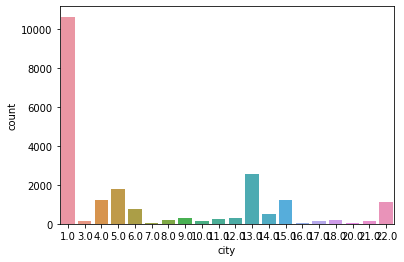

In [116]:
sns.countplot(df['city'])

<AxesSubplot:xlabel='city'>

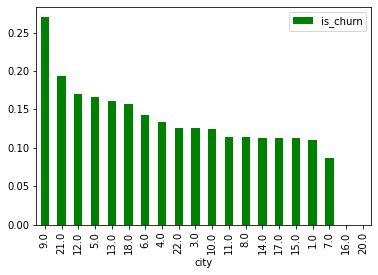

In [165]:
df.groupby('city')[['is_churn']].mean().sort_values(ascending=False, by='is_churn').plot.bar(color='g')

In [176]:
df['city_member_pop'] = pd.cut(df['city'], bins = [0,1,22],labels=['high','low'])

In [177]:
df['city_member_pop'].value_counts()

low     11204
high    10643
Name: city_member_pop, dtype: int64

In [209]:
df.groupby('city_member_pop')[['is_churn','is_auto_renew']].mean()

,is_churn,is_auto_renew
city_member_pop,,
high,0.109743,0.938006
low,0.145216,0.878274


### <font color = "red"> Bd (Age)</font> Null Values:
After replacing 0 with NaN, more than half of the ages are null. This might not be a useful customer segment.
<br>Adult vs minor vs senior

In [53]:
df['bd'].value_counts(dropna=False,normalize = True)

NaN     0.572050
27.0    0.025234
25.0    0.024783
26.0    0.023182
29.0    0.023141
          ...   
4.0     0.000041
81.0    0.000041
72.0    0.000041
66.0    0.000041
71.0    0.000041
Name: bd, Length: 76, dtype: float64

<AxesSubplot:xlabel='bd', ylabel='Count'>

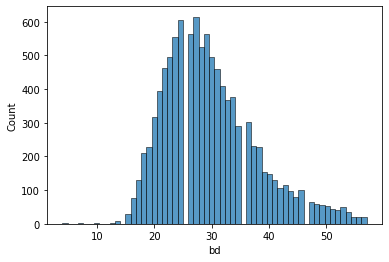

In [61]:
bd_df = df.loc[np.abs(df.bd - df.bd.mean())/ df.bd.std() < 2]
sns.histplot(bd_df['bd'])

In [69]:
df.groupby('city')[['bd']].agg([np.mean,np.median])

bd       
           mean median
city                  
1.0   28.798762   25.0
3.0   30.116667   28.0
4.0   29.203822   27.0
5.0   31.628731   30.0
6.0   30.065502   28.0
7.0   29.080000   27.5
8.0   27.373494   26.0
9.0   29.797834   28.0
10.0  29.568627   28.0
11.0  28.321739   27.0
12.0  28.287770   27.0
13.0  30.865601   29.0
14.0  32.985106   29.0
15.0  29.441712   29.0
16.0  29.476190   29.0
17.0  29.850000   27.5
18.0  28.616580   27.0
20.0  29.111111   32.0
21.0  25.872727   25.0
22.0  29.920926   29.0

### <font color = "red">Gender</font> Null Values:
Since gender is missing more than half of its values, it will not be a useful customer segment

/Users/thisbekristin/opt/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

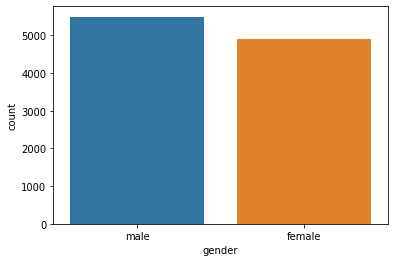

In [25]:
sns.countplot(df['gender'])

### <font color = "green">Registered_Via</font> Value Counts:
Despite 13 having the lowest churn, there are less people under that plan. More members were registered_via 7.0, and yielded the lowest churn considering the number enrolled.


<AxesSubplot:xlabel='registered_via', ylabel='count'>

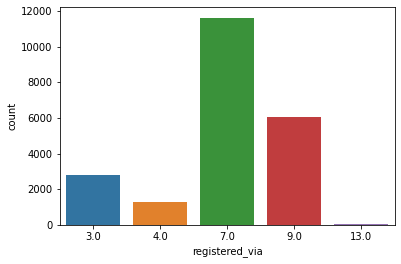

In [86]:
pop_registered_via = pd.DataFrame(df['registered_via'].value_counts(dropna=False)).reset_index()
pop_registered_via.columns = ['registered_via','count']
sns.barplot(x='registered_via',y='count',data=pop_registered_via)

In [211]:
registered_via = pd.DataFrame(df.groupby('registered_via')[['is_churn','is_auto_renew']].agg('mean').sort_values(by='is_churn',ascending=False)).reset_index()
registered_via

,registered_via,is_churn,is_auto_renew
0,4.0,0.249419,0.630796
1,3.0,0.170879,0.760477
2,9.0,0.144085,0.854514
3,7.0,0.096266,0.994274
4,13.0,0.028169,1.000000


<AxesSubplot:xlabel='registered_via', ylabel='is_churn'>

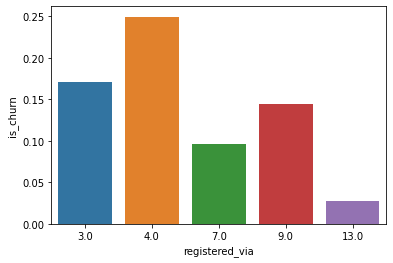

In [82]:
sns.barplot(x='registered_via', y='is_churn', data=registered_via)

### Payment_Method_id Value Counts:
The most payment_method_id used is **41**.

In [192]:
df['payment_method_id'].value_counts(dropna=False).head(20)

41.0    13302
39.0     2840
40.0     1590
36.0     1512
38.0      982
NaN       784
37.0      769
34.0      631
29.0      418
30.0      396
33.0      298
31.0      224
32.0      194
15.0       52
19.0       49
17.0       45
21.0       45
27.0       43
28.0       43
23.0       42
Name: payment_method_id, dtype: int64

<AxesSubplot:xlabel='payment_method_id', ylabel='count'>

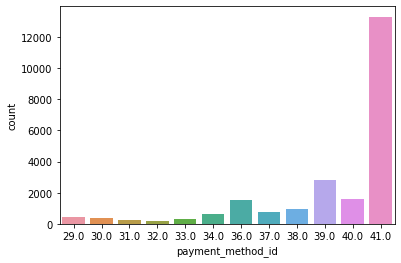

In [188]:
pop_payment = pd.DataFrame(df['payment_method_id'].value_counts(dropna=False)).reset_index().head(13)
pop_payment.columns = ['payment_method_id','count']
sns.barplot(x='payment_method_id',y='count',data=pop_payment)

In [196]:
payment = df[df['payment_method_id'] >= 30]

In [213]:
payment.groupby(['payment_method_id','city_member_pop'])[['is_churn','is_auto_renew']].mean().sort_values(by='is_churn',ascending=True)

,,is_churn,is_auto_renew
payment_method_id,city_member_pop,,
31.0,high,0.000000,1.000000
40.0,high,0.000000,1.000000
34.0,high,0.000000,1.000000
39.0,high,0.000000,1.000000
31.0,low,0.009390,0.995305
37.0,low,0.038360,1.000000
33.0,low,0.046595,1.000000
34.0,low,0.055556,1.000000
39.0,low,0.056835,1.000000


In [208]:
thir = payment[payment['payment_method_id'] ==33]
thir['is_churn'].value_counts(dropna=False)

0    285
1     13
Name: is_churn, dtype: int64

In [207]:
thir['is_churn'].mean()

0.008928571428571428

### Payment_Plan_Days
Popular length of membership plan is **30** days

In [212]:
df['payment_plan_days'].value_counts(dropna=False)

30.0     23067
NaN        784
410.0       82
90.0        76
195.0       67
180.0       63
0.0         40
240.0       38
60.0        36
7.0         30
360.0       29
100.0       18
120.0       14
395.0        6
200.0        5
400.0        4
1.0          3
450.0        2
80.0         2
365.0        2
70.0         1
415.0        1
14.0         1
110.0        1
Name: payment_plan_days, dtype: int64

In [214]:
payment.groupby(['payment_plan_days'])[['is_churn']].mean().sort_values(by='is_churn',ascending=True)

,is_churn
payment_plan_days,
30.0,0.082157
0.0,0.175000
60.0,0.500000
7.0,0.800000
90.0,0.898305
180.0,0.965517
110.0,1.000000
120.0,1.000000
415.0,1.000000


In [218]:
payment_plan = df[df['payment_plan_days']==30]
payment_plan.groupby(['registered_via'])[['is_churn','is_auto_renew']].mean().sort_values(by='is_churn',ascending=True)

,is_churn,is_auto_renew
registered_via,,
13.0,0.014286,1.000000
9.0,0.074416,0.891182
3.0,0.084376,0.798547
7.0,0.086528,0.997293
4.0,0.117813,0.679548


### Plan_List_Price

In [221]:
df['plan_list_price'].value_counts(dropna=False)

149.0     11796
99.0       7630
180.0      1930
129.0       974
NaN         784
100.0       687
0.0         115
1788.0       85
894.0        68
536.0        52
1200.0       49
300.0        41
150.0        31
477.0        22
447.0        19
480.0        15
298.0        12
600.0        12
1599.0       11
119.0        11
120.0         6
35.0          5
930.0         4
500.0         3
400.0         2
799.0         2
450.0         2
131.0         1
1299.0        1
1000.0        1
350.0         1
Name: plan_list_price, dtype: int64

In [228]:
payment_plan.groupby(['payment_plan_days','plan_list_price'])[['is_churn']].mean().sort_values(by='is_churn',ascending=True)

is_churn
payment_plan_days plan_list_price          
30.0              131.0            0.000000
                  100.0            0.027656
                  99.0             0.044168
                  150.0            0.064516
                  149.0            0.099610
                  180.0            0.107254
                  129.0            0.162218
                  120.0            0.333333
                  119.0            0.545455
                  0.0              1.000000

### Actual_Amount_Paid

In [229]:
df['actual_amount_paid'].value_counts(dropna=False)

149.0     11704
99.0       7643
180.0      1867
129.0       983
NaN         784
100.0       687
0.0         162
119.0        99
1788.0       85
894.0        68
536.0        52
1200.0       49
300.0        41
150.0        31
477.0        22
447.0        19
480.0        15
600.0        12
298.0        12
1599.0       11
35.0          5
930.0         4
120.0         4
500.0         3
400.0         2
799.0         2
450.0         2
1299.0        1
1000.0        1
131.0         1
350.0         1
Name: actual_amount_paid, dtype: int64

In [230]:
payment_plan.groupby(['payment_plan_days','actual_amount_paid'])[['is_churn']].mean().sort_values(by='is_churn',ascending=True)

is_churn
payment_plan_days actual_amount_paid          
30.0              120.0               0.000000
                  131.0               0.000000
                  100.0               0.027656
                  99.0                0.044093
                  150.0               0.064516
                  180.0               0.096411
                  149.0               0.098081
                  129.0               0.162080
                  119.0               0.186813
                  0.0                 0.545455